<a href="https://colab.research.google.com/github/kishanmb79/DeepLearning_With_ComputerVision/blob/master/CIFAR_Architecture_Assignment.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
from keras import backend as K
import time
import matplotlib.pyplot as plt
import numpy as np
% matplotlib inline
np.random.seed(2017) 
from keras.models import Sequential
from keras.layers.convolutional import Convolution2D, MaxPooling2D
from keras.layers import Activation, Flatten, Dense, Dropout
from keras.layers.normalization import BatchNormalization
from keras.utils import np_utils

In [3]:
from keras.datasets import cifar10
(train_features, train_labels), (test_features, test_labels) = cifar10.load_data()
num_train, img_channels, img_rows, img_cols =  train_features.shape
num_test, _, _, _ =  test_features.shape
num_classes = len(np.unique(train_labels))

170500096/170498071 [==============================] - 6s 0us/step


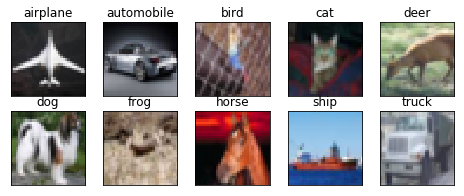

In [4]:
class_names = ['airplane','automobile','bird','cat','deer',
               'dog','frog','horse','ship','truck']
fig = plt.figure(figsize=(8,3))
for i in range(num_classes):
    ax = fig.add_subplot(2, 5, 1 + i, xticks=[], yticks=[])
    idx = np.where(train_labels[:]==i)[0]
    features_idx = train_features[idx,::]
    img_num = np.random.randint(features_idx.shape[0])
    im = features_idx[img_num]
    ax.set_title(class_names[i])
    plt.imshow(im)
plt.show()

In [0]:
def plot_model_history(model_history):
    fig, axs = plt.subplots(1,2,figsize=(15,5))
    # summarize history for accuracy
    axs[0].plot(range(1,len(model_history.history['acc'])+1),model_history.history['acc'])
    axs[0].plot(range(1,len(model_history.history['val_acc'])+1),model_history.history['val_acc'])
    axs[0].set_title('Model Accuracy')
    axs[0].set_ylabel('Accuracy')
    axs[0].set_xlabel('Epoch')
    axs[0].set_xticks(np.arange(1,len(model_history.history['acc'])+1),len(model_history.history['acc'])/10)
    axs[0].legend(['train', 'val'], loc='best')
    # summarize history for loss
    axs[1].plot(range(1,len(model_history.history['loss'])+1),model_history.history['loss'])
    axs[1].plot(range(1,len(model_history.history['val_loss'])+1),model_history.history['val_loss'])
    axs[1].set_title('Model Loss')
    axs[1].set_ylabel('Loss')
    axs[1].set_xlabel('Epoch')
    axs[1].set_xticks(np.arange(1,len(model_history.history['loss'])+1),len(model_history.history['loss'])/10)
    axs[1].legend(['train', 'val'], loc='best')
    plt.show()

In [0]:
def accuracy(test_x, test_y, model):
    result = model.predict(test_x)
    predicted_class = np.argmax(result, axis=1)
    true_class = np.argmax(test_y, axis=1)
    num_correct = np.sum(predicted_class == true_class) 
    accuracy = float(num_correct)/result.shape[0]
    return (accuracy * 100)

In [0]:
train_features = train_features.astype('float32')/255
test_features = test_features.astype('float32')/255
# convert class labels to binary class labels
train_labels = np_utils.to_categorical(train_labels, num_classes)
test_labels = np_utils.to_categorical(test_labels, num_classes)

# Updated Architecture

In [0]:
#
from keras.models import Model
from keras.layers import Input
from keras.layers import Activation
from keras.layers import concatenate
from keras.layers import Flatten

from keras.layers import SeparableConv2D
from keras.layers import DepthwiseConv2D
from keras.layers import SeparableConvolution2D

In [0]:
#

In [10]:
# Check this model 


#32x32x3
inputs = Input(shape=(32,32,3))

#Normal
x1 = Convolution2D(128,(3,3), padding='same', activation='relu')(inputs) #32x32x128


# Spatially Separable Convolution
x2 = Convolution2D(128,(3,1), padding='same', activation='relu')(inputs)  
x3 = Convolution2D(128,(1,3), padding='same', activation='relu')(inputs)
x4 = concatenate([x1,x2,x3]) #32x32x256



# Depthwise Separable Convolution
x5 = Convolution2D(64,(1,1), padding='same',activation='relu')(x4)  # 32x32x64

x6 = Convolution2D(96,(1,1), padding='same', activation='relu')(x4) # 32x32x96
x6 = Convolution2D(128,(3,3), padding='same', activation='relu')(x6) # 32x32x128

x7 = Convolution2D(32,(1,1), padding='same', activation='relu')(x4) # 32x32x32
x7 = Convolution2D(64,(5,5), padding='same', activation='relu')(x7) # 32x32x64

x8 = MaxPooling2D((2,2), padding='same', strides=(1,1))(x4) # 32x32x256
x8 = Convolution2D(32,(1,1), padding='same',activation='relu')(x8) # 32x32x32

x9 = concatenate([x5,x6,x7,x8]) # 32x32x624



# MaxPolling and 1x1 
x9 = Convolution2D(32,(1,1))(x9)       # 16x16x32
x9 = MaxPooling2D(pool_size=(2,2))(x9) # 16x16x32





#Grouped Convolution (use 3x3, 5x5 only)
x10 = Convolution2D(64,(3,3), padding='same', activation='relu')(x9) # 16x16x64
x11 = Convolution2D(64,(5,5), padding='same', activation='relu')(x9)# 16x16x64
x12 = concatenate([x10,x11]) # 16x16x192

# 1x1 and MaxPolling
x13 = Convolution2D(32,(1,1))(x12) # 16x16x32
x14 = MaxPooling2D(pool_size=(2,2))(x13) # 8x8x32


# Grouped Convolution (use 3x3 only) 
# one with dilation = 1 and another with dilation = 2
x15 = Convolution2D(64,(3,3), padding='same', activation='relu')(x14)  # 8x8x64
x16 = Convolution2D(64,(3,3), padding='same', activation='relu', dilation_rate=1)(x14)  # 8x8x64
x17 = Convolution2D(64,(3,3), padding='same', activation='relu', dilation_rate=2)(x14)  # 8x8x64

x18 = concatenate([x15,x16,x17])  # 8x8x98


# Last Layer
x19 = Convolution2D(32,(8,8), activation='relu')(x18) # 1x1x32
x20 = Convolution2D(10, (1,1), activation='relu')(x19) # 1x10


predictions = Flatten()(x20)
predictions = Activation('softmax')(predictions)

model = Model(inputs=inputs, output=predictions)



# Compile the model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

W0620 08:02:50.082465 139869137164160 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:74: The name tf.get_default_graph is deprecated. Please use tf.compat.v1.get_default_graph instead.

W0620 08:02:50.122176 139869137164160 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:517: The name tf.placeholder is deprecated. Please use tf.compat.v1.placeholder instead.

W0620 08:02:50.130736 139869137164160 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:4138: The name tf.random_uniform is deprecated. Please use tf.random.uniform instead.

W0620 08:02:50.260840 139869137164160 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:3976: The name tf.nn.max_pool is deprecated. Please use tf.nn.max_pool2d instead.

/usr/local/lib/python3.6/dist-packages/ipykernel_launch

In [11]:
model.summary()

__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            (None, 32, 32, 3)    0                                            
__________________________________________________________________________________________________
conv2d_1 (Conv2D)               (None, 32, 32, 128)  3584        input_1[0][0]                    
__________________________________________________________________________________________________
conv2d_2 (Conv2D)               (None, 32, 32, 128)  1280        input_1[0][0]                    
__________________________________________________________________________________________________
conv2d_3 (Conv2D)               (None, 32, 32, 128)  1280        input_1[0][0]                    
__________________________________________________________________________________________________
concatenat

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:12: UserWarning: The semantics of the Keras 2 argument `steps_per_epoch` is not the same as the Keras 1 argument `samples_per_epoch`. `steps_per_epoch` is the number of batches to draw from the generator at each epoch. Basically steps_per_epoch = samples_per_epoch/batch_size. Similarly `nb_val_samples`->`validation_steps` and `val_samples`->`steps` arguments have changed. Update your method calls accordingly.
  if sys.path[0] == '':
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:12: UserWarning: Update your `fit_generator` call to the Keras 2 API: `fit_generator(<keras_pre..., validation_data=(array([[[..., verbose=1, steps_per_epoch=390, epochs=15)`
  if sys.path[0] == '':


Epoch 1/15
390/390 [==============================] - 102s 261ms/step - loss: 1.6471 - acc: 0.4333 - val_loss: 1.3144 - val_acc: 0.5671
Epoch 2/15
390/390 [==============================] - 103s 263ms/step - loss: 1.0935 - acc: 0.6400 - val_loss: 0.9930 - val_acc: 0.6795
Epoch 3/15
390/390 [==============================] - 102s 261ms/step - loss: 0.8683 - acc: 0.7152 - val_loss: 0.9124 - val_acc: 0.7037
Epoch 4/15
390/390 [==============================] - 102s 261ms/step - loss: 0.6483 - acc: 0.7867 - val_loss: 0.7190 - val_acc: 0.7589
Epoch 5/15
390/390 [==============================] - 102s 261ms/step - loss: 0.4545 - acc: 0.8476 - val_loss: 0.6802 - val_acc: 0.7759
Epoch 6/15
390/390 [==============================] - 102s 261ms/step - loss: 0.3397 - acc: 0.8853 - val_loss: 0.6938 - val_acc: 0.7774
Epoch 7/15
390/390 [==============================] - 102s 261ms/step - loss: 0.2441 - acc: 0.9178 - val_loss: 0.8044 - val_acc: 0.7641
Epoch 8/15
390/390 [============================

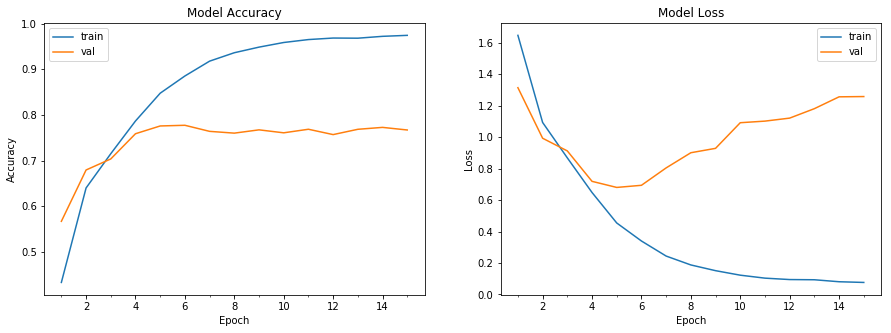

Accuracy on test data is: 76.71


In [13]:
from keras.preprocessing.image import ImageDataGenerator

datagen = ImageDataGenerator(zoom_range=0.0, 
                             horizontal_flip=False)


# train the model
start = time.time()
# Train the model
model_info = model.fit_generator(datagen.flow(train_features, train_labels, batch_size = 128),
                                 samples_per_epoch = train_features.shape[0], nb_epoch = 15, 
                                 validation_data = (test_features, test_labels), verbose=1)
end = time.time()
print ("Model took %0.2f seconds to train"%(end - start))
# plot model history
plot_model_history(model_info)
# compute test accuracy
print ("Accuracy on test data is: %0.2f"%accuracy(test_features, test_labels, model))

In [0]:
#